In [732]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [733]:
# import data
df = pd.read_csv("day.csv")

In [734]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [735]:
# Checking no. of null values present in the dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [736]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [737]:
# Checking mathematical information
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [738]:
# Dropping unnecessary variables
df.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [739]:
# Checking columns
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

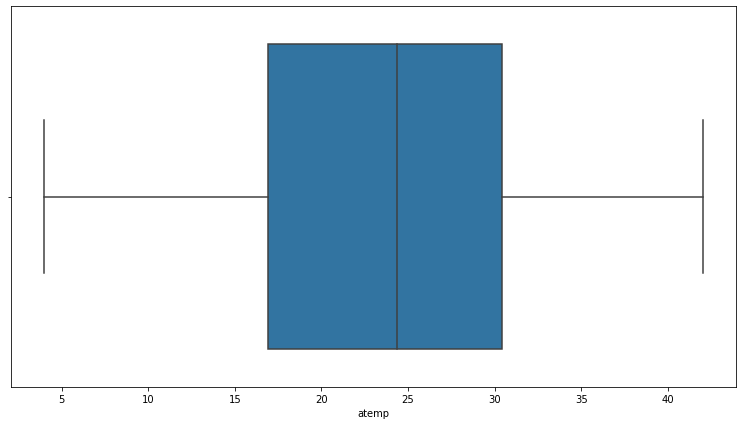

In [740]:
# Plotting continuous varaiables boxplot and also checking outliers
plt.figure(figsize=(13,7))
sns.boxplot(df.atemp)
plt.show()

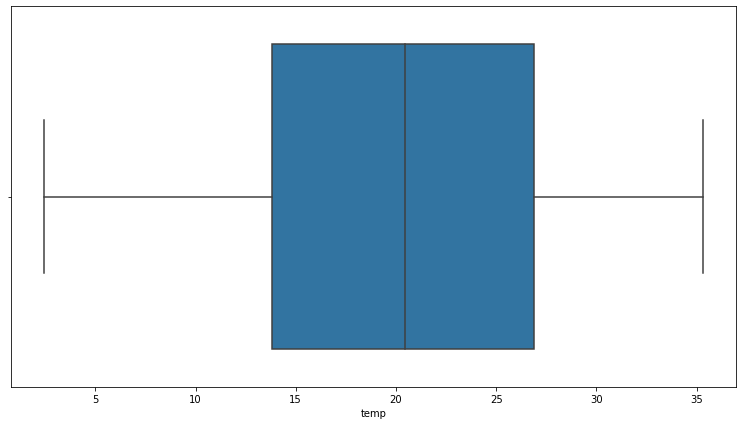

In [741]:
# Plotting continuous varaiables boxplot and also checking outliers
plt.figure(figsize=(13,7))
sns.boxplot(df.temp)
plt.show()

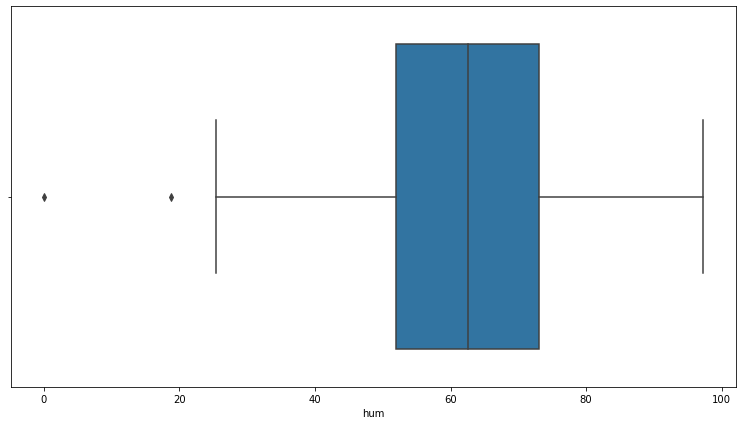

In [742]:
# Plotting continuous varaiables boxplot and also checking outliers
plt.figure(figsize=(13,7))
sns.boxplot(df.hum)
plt.show()

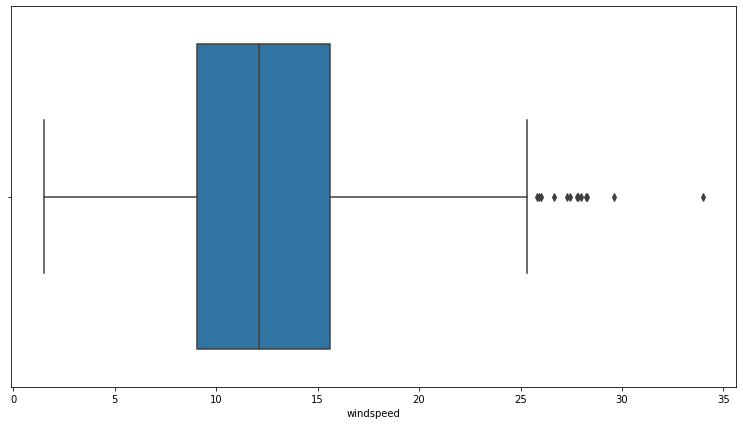

In [743]:
# Plotting continuous varaiables boxplot and also checking outliers
plt.figure(figsize=(13,7))
sns.boxplot(df.windspeed)
plt.show()

### Observation : From above boxplots, we can see there are no outliers

## Data visualization

<AxesSubplot:xlabel='yr', ylabel='cnt'>

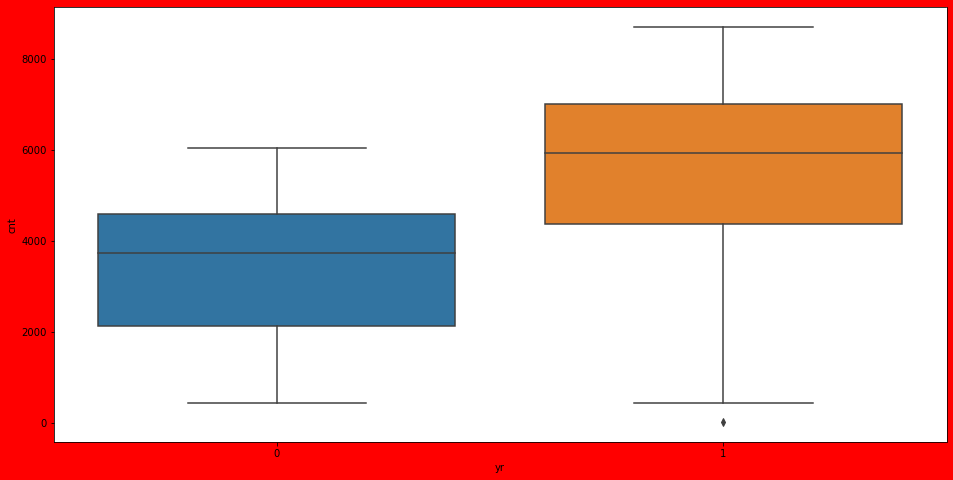

In [744]:
# Analysing categorical variables with target variables
plt.figure(figsize=(16,8),facecolor='r')
pt=sns.boxplot(y='cnt',x="yr",data=df)
pt

### Rental Bikes demand had been grown for next year.

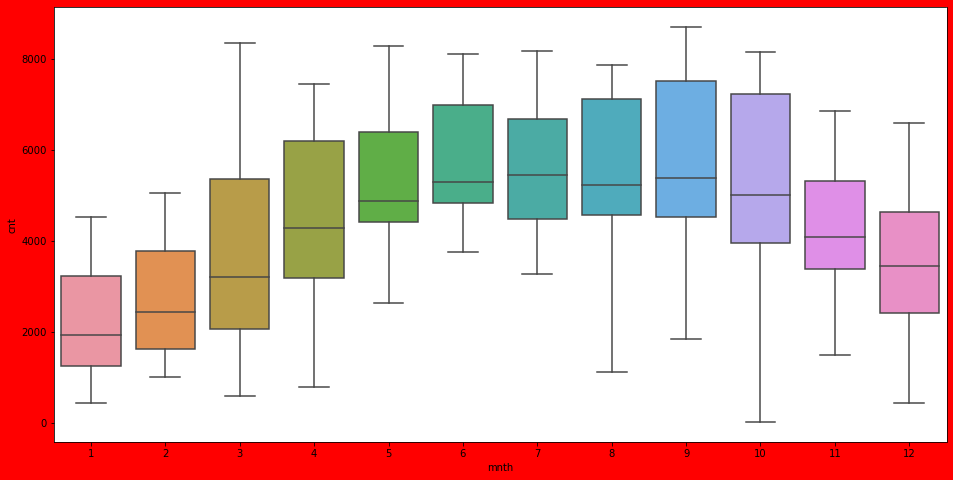

In [745]:
# Analysing categorical variables with target variables
plt.figure(figsize=(16,8),facecolor='r')
pt=sns.boxplot(y='cnt',x="mnth",data=df)

### Rental Bikes had high demand till month of september after that it decreases

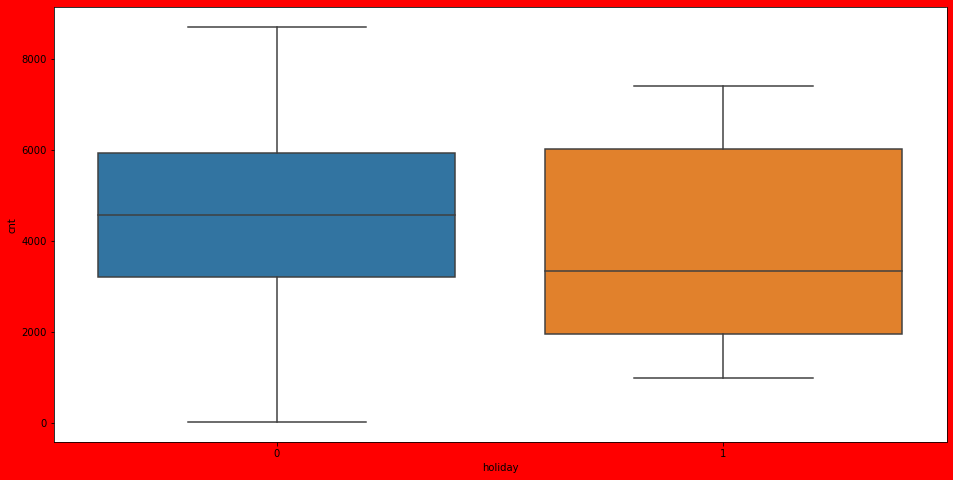

In [746]:
# Analysing categorical variables with target variables
plt.figure(figsize=(16,8),facecolor='r')
pt=sns.boxplot(y='cnt',x="holiday",data=df)

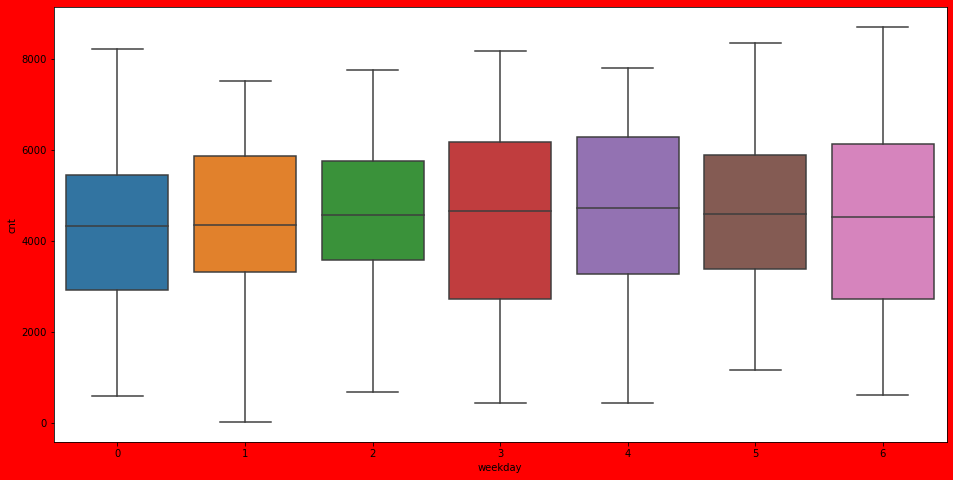

In [747]:
# Analysing categorical variables with target variables
plt.figure(figsize=(16,8),facecolor='r')
pt=sns.boxplot(y='cnt',x="weekday",data=df)

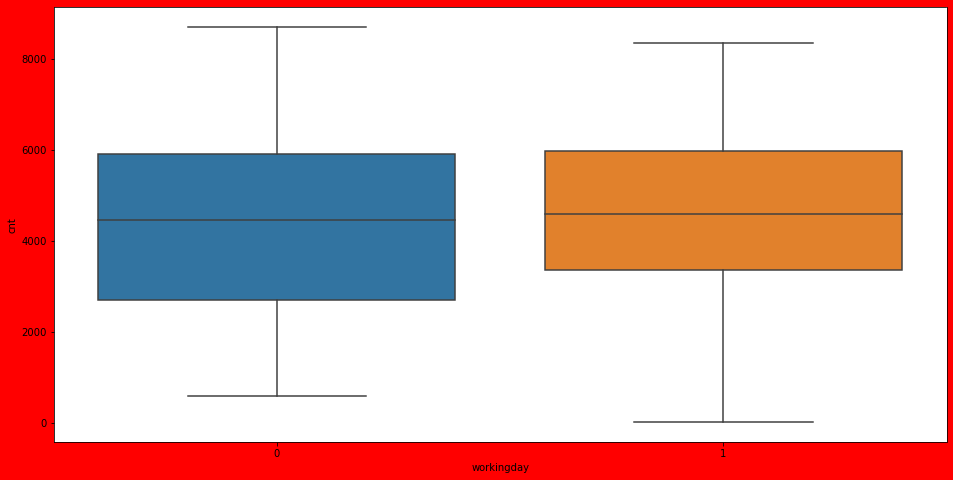

In [748]:
# Analysing categorical variables with target variables
plt.figure(figsize=(16,8),facecolor='r')
pt=sns.boxplot(y='cnt',x="workingday",data=df)

### Working day, weekday and holiday is not affecting target variable or not giving any clear information of demands on rental bikes.


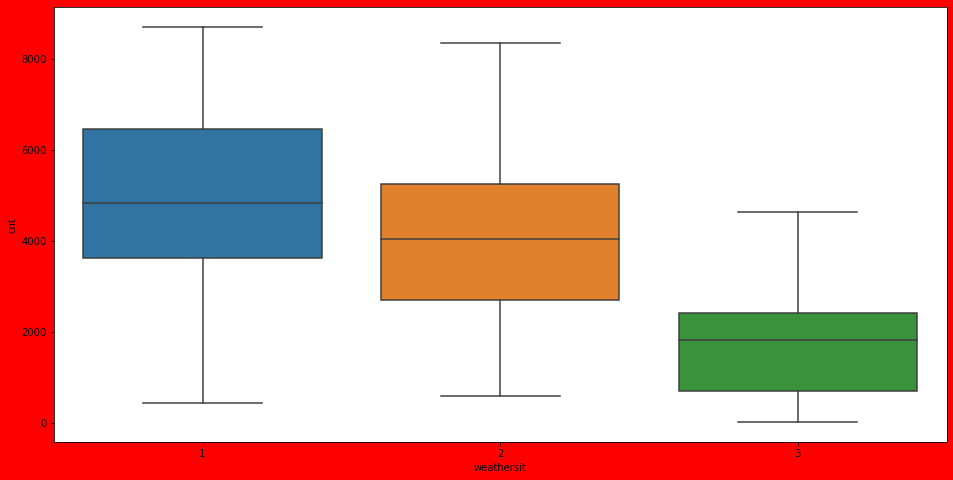

In [749]:
# Analysing categorical variables with target variables
plt.figure(figsize=(16,8),facecolor='r')
pt=sns.boxplot(y='cnt',x="weathersit",data=df)

### Clear weather demands for high rental bikes.
### Season 3 has highest demand for rental bikes.

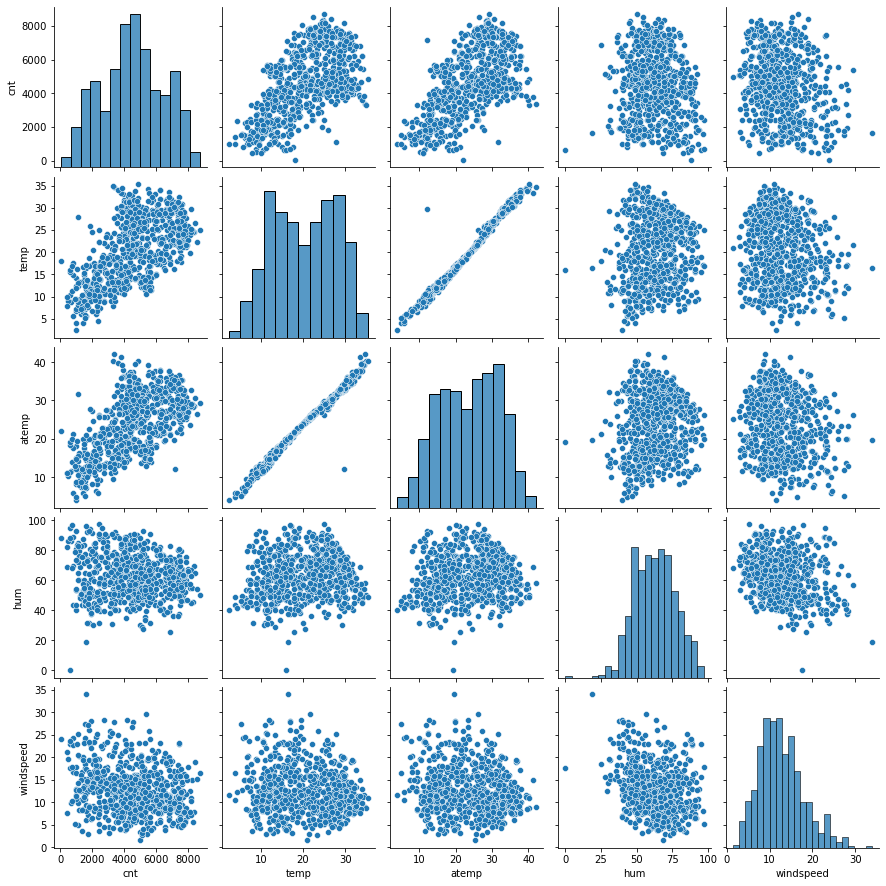

In [750]:
# Pairplot of numerical or continuous variables
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

## Observations :
1) 'temp' and 'atemp' are highly correlated with each other.
2) 'temp' and 'atemp' are highly correlated with target variable('cnt').

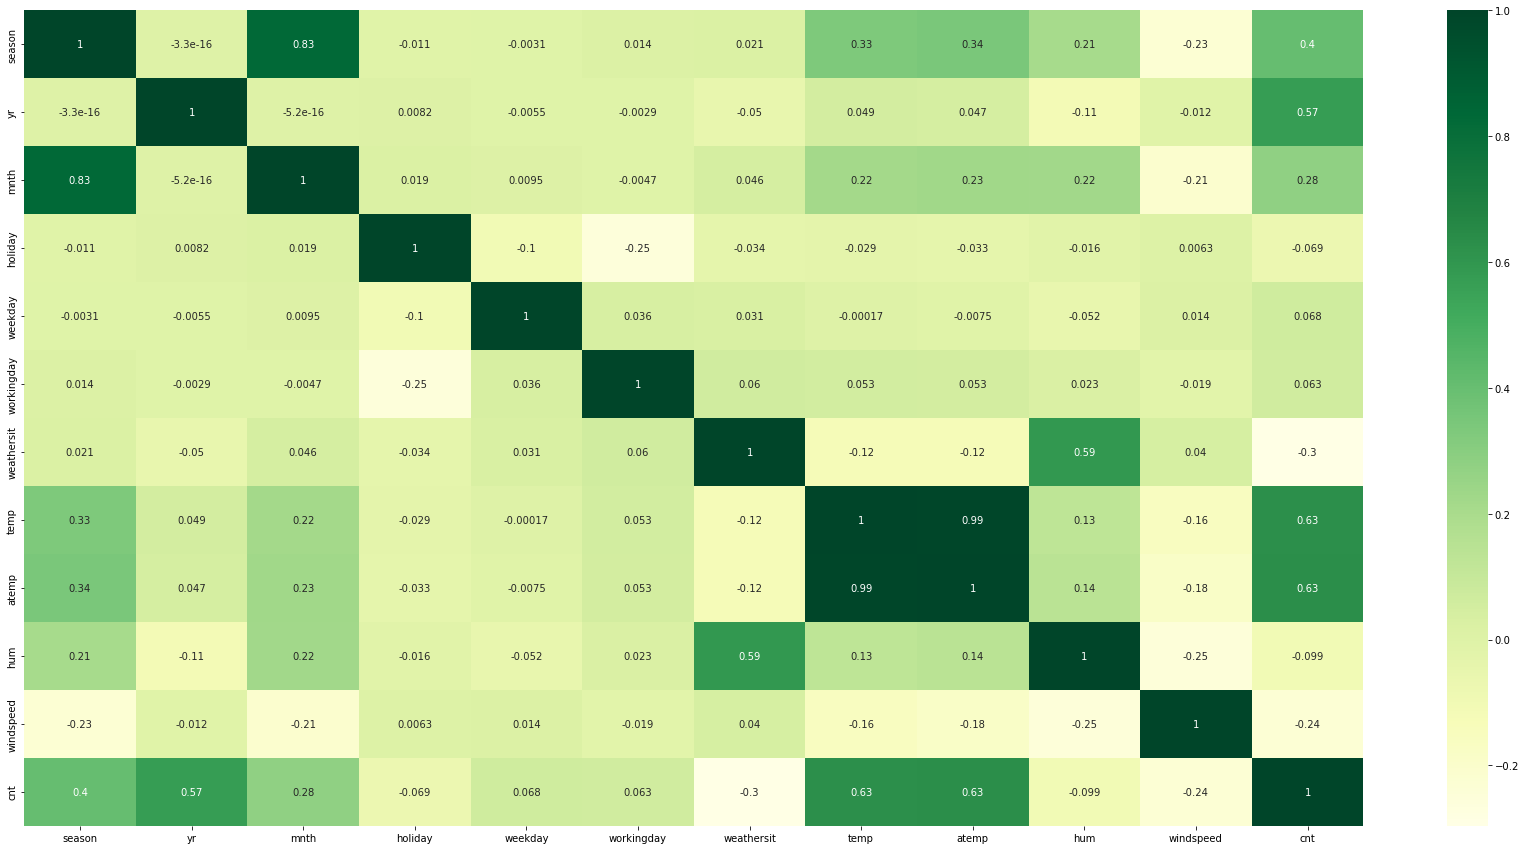

In [751]:
# Viewing correlation
corr = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True, cmap='YlGn' )
plt.show()

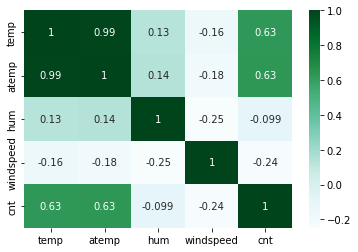

In [752]:
# Checking continuous variable correlation using heatmap
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [753]:
#checking no. of (rows, columns)
df.shape

(730, 12)

# Dummy variables

In [754]:
#Creating dummy variables for season 
season_status = pd.get_dummies(df["season"])
season_status.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [755]:
#season_status variables rename
season_status.rename(columns={1:'Spring', 2:"Summer",3:"Fall",4:"Winter"},inplace=True)
season_status.head()

,Spring,Summer,Fall,Winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [756]:
# Add the results to the original df dataframe
df = pd.concat([df, season_status], axis = 1)

#drop season variable
df = df.drop("season",axis=1)
df

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Fall,Winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0
726,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0
727,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0
728,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0


In [757]:
# Creating dummy variables for mnth 
mnth_status = pd.get_dummies(df["mnth"])
mnth_status.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [758]:
# mnth_status variables rename
mnth_status.rename(columns = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7: 'Jul', 8:'Aug' , 9:'Sep' , 10:'Oct', 11:'Nov' , 12:'Dec' }, inplace = True)

# Add the results to the original df dataframe
df = pd.concat([df, mnth_status], axis = 1)

# Drop mnth variable
df = df.drop("mnth",axis=1)
df

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,...,0,0,0,0,0,0,0,0,0,1
726,1,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,...,0,0,0,0,0,0,0,0,0,1
727,1,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,...,0,0,0,0,0,0,0,0,0,1


In [759]:
# Creating dummy variables for weekday 
weekday_status = pd.get_dummies(df["weekday"])
weekday_status.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [760]:
# weekday_status variables rename
weekday_status.rename(columns={0:'Sunday', 1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
weekday_status.head()

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [761]:
# Add the results to the original df dataframe
df = pd.concat([df, weekday_status], axis = 1)

# Drop weekday variable
df = df.drop("weekday", axis=1)
df

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,...,Oct,Nov,Dec,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,2,10.420847,11.33210,65.2917,23.458911,2114,1,...,0,0,1,0,0,0,0,1,0,0
726,1,0,1,2,10.386653,12.75230,59.0000,10.416557,3095,1,...,0,0,1,0,0,0,0,0,1,0
727,1,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,1,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,...,0,0,1,1,0,0,0,0,0,0


In [762]:
# Creating dummy variables for weathersit
weathersit_status = pd.get_dummies(df["weathersit"])
weathersit_status.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [763]:
# weathersit_status remane
weathersit_status.rename(columns={1:"Clear", 2:"Mist",3:"Rain"},inplace=True)
weathersit_status.head()

,Clear,Mist,Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [764]:
# Add the results to the original df dataframe
df = pd.concat([df, weathersit_status], axis = 1)

# Drop weathersit variable
df = df.drop("weathersit", axis=1)
df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Clear,Mist,Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,1,0,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,1,0,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,1,0,0,0,0,0,0,1,0,0


In [765]:
# Dataset columns review
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Fall', 'Winter', 'Jan', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Clear', 'Mist', 'Rain'],
      dtype='object')

# Train-Test Split

In [766]:
# Splitting data into train-test set
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling Feature

In [767]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [768]:
# Rescaling variables
num_vars = ["atemp", "windspeed", "hum",  "cnt"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Clear,Mist,Rain
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,1,0,0,0,0,1,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,1,0


In [769]:
# Checking train shape
df_train.shape

(510, 34)

In [770]:
# Checking test shape
df_test.shape

(219, 34)

In [771]:
# Dividing into X and Y sets for the model building
y_train =  df_train.pop("cnt")
X_train = df_train

In [772]:
# Veiwing y_train
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [773]:
# Veiwing X_train
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Fall,...,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Clear,Mist,Rain
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0,0,1,...,0,0,1,0,0,0,0,1,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,0.762183,0.605840,0.355596,0,1,0,...,0,1,0,0,0,0,0,0,1,0
578,1,0,1,30.852500,0.824359,0.679690,0.187140,0,0,1,...,0,0,0,0,1,0,0,1,0,0
53,0,0,1,9.091299,0.218747,0.435939,0.111379,1,0,0,...,0,0,0,1,0,0,0,1,0,0
350,0,0,0,10.591653,0.223544,0.577930,0.431816,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# Model Building

In [774]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [775]:
#RFE(Recursive feature elimination)
# Running RFE with the output number of the variable 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=17)             
rfe = rfe.fit(X_train, y_train)

In [776]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 9),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 10),
 ('Fall', False, 4),
 ('Winter', True, 1),
 ('Jan', True, 1),
 ('Feb', False, 2),
 ('Mar', False, 13),
 ('Apr', False, 14),
 ('May', False, 3),
 ('Jun', False, 15),
 ('Jul', True, 1),
 ('Aug', False, 5),
 ('Sep', True, 1),
 ('Oct', False, 12),
 ('Nov', True, 1),
 ('Dec', True, 1),
 ('Sunday', False, 6),
 ('Monday', False, 7),
 ('Tuesday', False, 8),
 ('Wednesday', False, 17),
 ('Thursday', False, 16),
 ('Friday', False, 11),
 ('Saturday', True, 1),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Rain', True, 1)]

In [777]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Jan', 'Jul', 'Sep', 'Nov', 'Dec', 'Saturday', 'Clear',
       'Mist', 'Rain'],
      dtype='object')

In [778]:
X_train.columns[~rfe.support_]

Index(['temp', 'Summer', 'Fall', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Aug',
       'Oct', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [779]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [780]:
# Adding a constant variable
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [781]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear mode

In [782]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.23e-189
Time:                        22:12:03   Log-Likelihood:                 516.50
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1643      0.028      5.867      0.0

In [783]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [784]:
# Dropping 'holiday' variable because of its high p-value
X_train_rfe.drop("holiday", axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_rfe).fit()
lr_1.params

const         0.159576
yr            0.232737
workingday    0.052006
atemp         0.440918
hum          -0.137021
windspeed    -0.167355
Spring       -0.107443
Winter        0.068769
Jan          -0.053752
Jul          -0.063922
Sep           0.055053
Nov          -0.055310
Dec          -0.051484
Saturday      0.062474
Clear         0.159548
Mist          0.098205
Rain         -0.098177
dtype: float64

In [785]:
#summary of lr_1(linear_model_1)
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.71e-189
Time:                        22:12:03   Log-Likelihood:                 514.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     494   BIC:                            -930.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1596      0.028      5.713      0.000       0.105       0.214
yr             0.2327      0.008     28.852      0.000       0.217       0.249
workingday     0.0520      0.011      4.767      0.000       0.031       0.073
atemp          0.4409      0.034     12.796      0.000       0.373       0.509
hum           -0.1370      0.038     -3.630      0.000      -0.211      -0.063
windspeed     -0.1674      0.026     -6.504      0.000      -0.218      -0.117
Spring        -0.1074      0.015     -7.094      0.000      -0.137      -0.078
Winter         0.0688      0.014      4.944      0.000       0.041       0.096
Jan           -0.0538      0.018     -2.994      0.003      -0.089      -0.018
Jul           -0.0639      0.017     -3.749      0.000      -0.097      -0.030
Sep            0.0551      0.015      3.578      0.000       0.025       0.085
Nov           -0.0553      0.018     -3.019      0.003      -0.091      -0.019
Dec           -0.0515      0.017     -2.999      0.003      -0.085      -0.018
Saturday       0.0625      0.014      4.437      0.000       0.035       0.090
Clear          0.1595      0.010     16.156      0.000       0.140       0.179
Mist           0.0982      0.012      8.066      0.000       0.074       0.122
Rain          -0.0982      0.022     -4.425      0.000      -0.142      -0.055
==============================================================================
Omnibus:                       82.147   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.610
Skew:                          -0.751   Prob(JB):                     2.31e-55
Kurtosis:                       6.096   Cond. No.                     6.30e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [786]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Clear,43.81
14,Mist,30.04
15,Rain,4.04
2,atemp,3.40
5,Spring,2.68
6,Winter,2.30
3,hum,1.92
10,Nov,1.68
1,workingday,1.66
7,Jan,1.65


In [787]:
# Dropping 'Clear' variable because of high VIF
X_train_rfe.drop("Clear", axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train, X_train_rfe).fit()
lr_2.params

const         0.319124
yr            0.232737
workingday    0.052006
atemp         0.440918
hum          -0.137021
windspeed    -0.167355
Spring       -0.107443
Winter        0.068769
Jan          -0.053752
Jul          -0.063922
Sep           0.055053
Nov          -0.055310
Dec          -0.051484
Saturday      0.062474
Mist         -0.061342
Rain         -0.257725
dtype: float64

In [788]:
#summary of lr_2(linear_model_2)

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.71e-189
Time:                        22:12:03   Log-Likelihood:                 514.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     494   BIC:                            -930.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3191      0.033      9.628      0.000       0.254       0.384
yr             0.2327      0.008     28.852      0.000       0.217       0.249
workingday     0.0520      0.011      4.767      0.000       0.031       0.073
atemp          0.4409      0.034     12.796      0.000       0.373       0.509
hum           -0.1370      0.038     -3.630      0.000      -0.211      -0.063
windspeed     -0.1674      0.026     -6.504      0.000      -0.218      -0.117
Spring        -0.1074      0.015     -7.094      0.000      -0.137      -0.078
Winter         0.0688      0.014      4.944      0.000       0.041       0.096
Jan           -0.0538      0.018     -2.994      0.003      -0.089      -0.018
Jul           -0.0639      0.017     -3.749      0.000      -0.097      -0.030
Sep            0.0551      0.015      3.578      0.000       0.025       0.085
Nov           -0.0553      0.018     -3.019      0.003      -0.091      -0.019
Dec           -0.0515      0.017     -2.999      0.003      -0.085      -0.018
Saturday       0.0625      0.014      4.437      0.000       0.035       0.090
Mist          -0.0613      0.010     -5.845      0.000      -0.082      -0.041
Rain          -0.2577      0.026     -9.743      0.000      -0.310      -0.206
==============================================================================
Omnibus:                       82.147   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.610
Skew:                          -0.751   Prob(JB):                     2.31e-55
Kurtosis:                       6.096   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [789]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.65
2,atemp,17.69
1,workingday,4.67
4,windspeed,4.12
6,Winter,2.93
5,Spring,2.92
13,Mist,2.26
0,yr,2.07
12,Saturday,1.83
10,Nov,1.80


In [790]:
# Droppind 'hum' because of it's high VIF value

X_train_rfe.drop("hum", axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()
lr_3.params

const         0.246679
yr            0.236031
workingday    0.054522
atemp         0.408830
windspeed    -0.144068
Spring       -0.109750
Winter        0.061082
Jan          -0.058660
Jul          -0.056775
Sep           0.052070
Nov          -0.054782
Dec          -0.056805
Saturday      0.066681
Mist         -0.083385
Rain         -0.296388
dtype: float64

In [791]:
#summary of lr_3(linear_model_3)

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.25e-187
Time:                        22:12:03   Log-Likelihood:                 508.22
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     495   BIC:                            -922.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2467      0.027      9.209      0.000       0.194       0.299
yr             0.2360      0.008     29.092      0.000       0.220       0.252
workingday     0.0545      0.011      4.947      0.000       0.033       0.076
atemp          0.4088      0.034     12.128      0.000       0.343       0.475
windspeed     -0.1441      0.025     -5.712      0.000      -0.194      -0.095
Spring        -0.1097      0.015     -7.165      0.000      -0.140      -0.080
Winter         0.0611      0.014      4.389      0.000       0.034       0.088
Jan           -0.0587      0.018     -3.237      0.001      -0.094      -0.023
Jul           -0.0568      0.017     -3.311      0.001      -0.090      -0.023
Sep            0.0521      0.016      3.348      0.001       0.022       0.083
Nov           -0.0548      0.019     -2.954      0.003      -0.091      -0.018
Dec           -0.0568      0.017     -3.281      0.001      -0.091      -0.023
Saturday       0.0667      0.014      4.695      0.000       0.039       0.095
Mist          -0.0834      0.009     -9.624      0.000      -0.100      -0.066
Rain          -0.2964      0.025    -12.094      0.000      -0.345      -0.248
==============================================================================
Omnibus:                       85.682   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.500
Skew:                          -0.787   Prob(JB):                     4.47e-57
Kurtosis:                       6.120   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [792]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.60
1,workingday,4.57
3,windspeed,4.09
5,Winter,2.57
4,Spring,2.43
0,yr,2.06
11,Saturday,1.82
9,Nov,1.77
6,Jan,1.67
12,Mist,1.56


In [793]:
# Dropping 'atemp' because of it's high VIF value
X_train_rfe.drop("atemp", axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train, X_train_rfe).fit()
lr_4.params

const         0.517697
yr            0.246345
workingday    0.056978
windspeed    -0.205494
Spring       -0.215899
Winter        0.010951
Jan          -0.122624
Jul           0.015841
Sep           0.075026
Nov          -0.101237
Dec          -0.110895
Saturday      0.066779
Mist         -0.091493
Rain         -0.317304
dtype: float64

In [794]:
#summary of lr_4(linear_model_4)
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.61e-161
Time:                        22:12:03   Log-Likelihood:                 441.88
No. Observations:                 510   AIC:                            -855.8
Df Residuals:                     496   BIC:                            -796.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5177      0.017     30.809      0.000       0.485       0.551
yr             0.2463      0.009     26.834      0.000       0.228       0.264
workingday     0.0570      0.013      4.545      0.000       0.032       0.082
windspeed     -0.2055      0.028     -7.310      0.000      -0.261      -0.150
Spring        -0.2159      0.014    -15.097      0.000      -0.244      -0.188
Winter         0.0110      0.015      0.724      0.469      -0.019       0.041
Jan           -0.1226      0.020     -6.217      0.000      -0.161      -0.084
Jul            0.0158      0.018      0.867      0.387      -0.020       0.052
Sep            0.0750      0.018      4.272      0.000       0.041       0.110
Nov           -0.1012      0.021     -4.904      0.000      -0.142      -0.061
Dec           -0.1109      0.019     -5.826      0.000      -0.148      -0.073
Saturday       0.0668      0.016      4.132      0.000       0.035       0.099
Mist          -0.0915      0.010     -9.309      0.000      -0.111      -0.072
Rain          -0.3173      0.028    -11.408      0.000      -0.372      -0.263
==============================================================================
Omnibus:                       69.435   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.194
Skew:                          -0.714   Prob(JB):                     1.34e-36
Kurtosis:                       5.395   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [795]:
# Dropping 'Winter' because of it's high pf value
X_train_rfe.drop("Winter", axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train, X_train_rfe).fit()
lr_5.params

const         0.520676
yr            0.246356
workingday    0.056443
windspeed    -0.206651
Spring       -0.219195
Jan          -0.121650
Jul           0.013457
Sep           0.074916
Nov          -0.092733
Dec          -0.104674
Saturday      0.066520
Mist         -0.091258
Rain         -0.314469
dtype: float64

In [796]:
#summary of lr_5(linear_model_5)

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.64e-162
Time:                        22:12:03   Log-Likelihood:                 441.61
No. Observations:                 510   AIC:                            -857.2
Df Residuals:                     497   BIC:                            -802.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5207      0.016     31.973      0.000       0.489       0.553
yr             0.2464      0.009     26.848      0.000       0.228       0.264
workingday     0.0564      0.013      4.512      0.000       0.032       0.081
windspeed     -0.2067      0.028     -7.366      0.000      -0.262      -0.152
Spring        -0.2192      0.014    -16.175      0.000      -0.246      -0.193
Jan           -0.1217      0.020     -6.185      0.000      -0.160      -0.083
Jul            0.0135      0.018      0.749      0.454      -0.022       0.049
Sep            0.0749      0.018      4.268      0.000       0.040       0.109
Nov           -0.0927      0.017     -5.465      0.000      -0.126      -0.059
Dec           -0.1047      0.017     -6.165      0.000      -0.138      -0.071
Saturday       0.0665      0.016      4.119      0.000       0.035       0.098
Mist          -0.0913      0.010     -9.295      0.000      -0.111      -0.072
Rain          -0.3145      0.028    -11.425      0.000      -0.369      -0.260
==============================================================================
Omnibus:                       67.021   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.571
Skew:                          -0.701   Prob(JB):                     2.73e-34
Kurtosis:                       5.304   Cond. No.                         9.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [797]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.48
1,workingday,3.14
3,Spring,2.11
0,yr,1.87
4,Jan,1.63
9,Saturday,1.54
10,Mist,1.53
6,Sep,1.14
7,Nov,1.14
8,Dec,1.13


In [798]:
# Dropping Jul because of it's high pf value
X_train_rfe.drop("Jul", axis=1, inplace=True)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(y_train, X_train_rfe).fit()
lr_6.params

const         0.523449
yr            0.246369
workingday    0.056291
windspeed    -0.208299
Spring       -0.220717
Jan          -0.121911
Sep           0.073011
Nov          -0.094607
Dec          -0.106112
Saturday      0.066506
Mist         -0.092071
Rain         -0.314764
dtype: float64

In [799]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.49e-163
Time:                        22:12:03   Log-Likelihood:                 441.33
No. Observations:                 510   AIC:                            -858.7
Df Residuals:                     498   BIC:                            -807.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5234      0.016     33.023      0.000       0.492       0.555
yr             0.2464      0.009     26.862      0.000       0.228       0.264
workingday     0.0563      0.013      4.503      0.000       0.032       0.081
windspeed     -0.2083      0.028     -7.451      0.000      -0.263      -0.153
Spring        -0.2207      0.013    -16.481      0.000      -0.247      -0.194
Jan           -0.1219      0.020     -6.202      0.000      -0.161      -0.083
Sep            0.0730      0.017      4.205      0.000       0.039       0.107
Nov           -0.0946      0.017     -5.639      0.000      -0.128      -0.062
Dec           -0.1061      0.017     -6.293      0.000      -0.139      -0.073
Saturday       0.0665      0.016      4.120      0.000       0.035       0.098
Mist          -0.0921      0.010     -9.440      0.000      -0.111      -0.073
Rain          -0.3148      0.028    -11.442      0.000      -0.369      -0.261
==============================================================================
Omnibus:                       67.791   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.420
Skew:                          -0.706   Prob(JB):                     6.56e-35
Kurtosis:                       5.327   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [800]:
vif = pd.DataFrame()
X_train_rfe=X_train_rfe.drop(["const"],axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.47
1,workingday,3.06
3,Spring,2.08
0,yr,1.86
4,Jan,1.63
8,Saturday,1.52
9,Mist,1.52
6,Nov,1.13
5,Sep,1.12
7,Dec,1.12


# Residual analysis on train data

In [801]:
# Residual Analysis
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred = lr_6.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

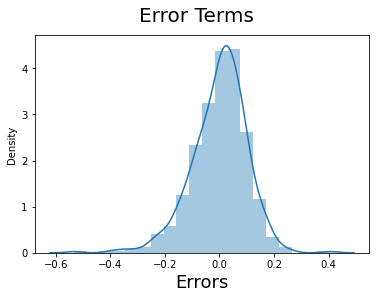

In [802]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)    

### Observation : Errors are normally distributed with mean 0

# Predictions

In [803]:
#Applying the scaling on test sets
num_vars = ['atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [804]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [805]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train_rfe.drop("const", axis = 1, inplace = True)
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [806]:
# Making predictions
y_pred = lr_6.predict(X_test_new)

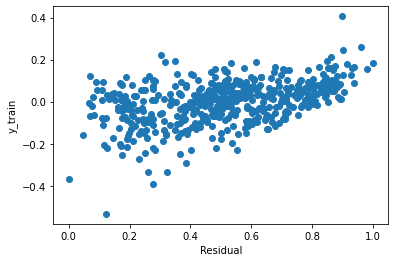

In [807]:
# Scatter plot for linearity check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# Model Evaluation

Text(0, 0.5, 'y_pred')

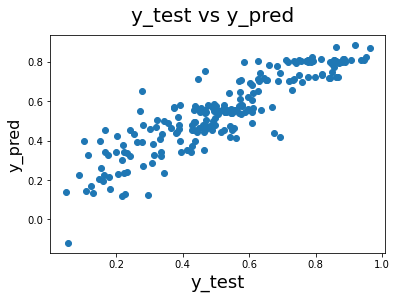

In [808]:
# Model Evaluation 
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

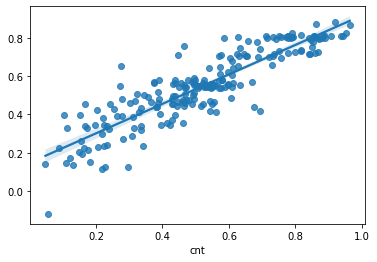

In [809]:
# Regression line on test set
sns.regplot(x= (y_test),y=y_pred)
plt.show()

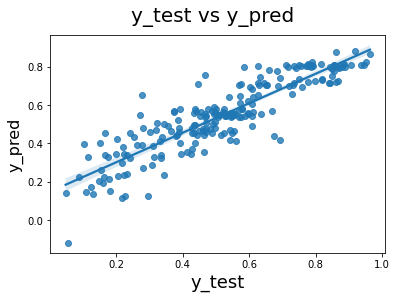

In [810]:
# Visualisation of Regression line between y_test and y_predict

fig = plt.figure()
sns.regplot(x= (y_test),y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.show()

In [811]:
# Checking R2 on testing data
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
round(r2,3)

0.774

### R2 on training data = 0.794 (79.4%)
### R2 on testing data = 0.774 (77.4%)

In [812]:
# Checking Adjusted R2 on testing data
adj_r2 = (1 - (1 - r2) * ((X_test_new.shape[0] - 1) / 
          (X_test_new.shape[0] - X_test_new.shape[1] - 1)))
adj_r2

0.761306235623703

### Adjusted R2 on training dataseet = 0.789(78.9%)
### Adjusted R2 on test dataseet = 0.761(76.1%)

We can see the equation of best fit line :
cnt = 0.2464*year + 0.0730*Sep + 0.0665*Saturday - 0.0563*workingday - 0.0921*Mist - 0.0946*Nov - 
      0.1061*Dec - 0.1219*Jan  - 0.2083*Windspeed

### Conclusion on dataset:
#### 1. From scattering diagram we can clearly see that Error is normally distributed.
#### 2. R-Squared value on train dataset is 79.4% and on test dataset is77.4% hence model is working fine on unseen dataset.¶
#### 3. Adjusted R-Squared value on train dataset is 78.9% and on test datase is 76.1% .